# Weather Prediction CNN Model Training
This notebook demonstrates the training process of a CNN model for weather prediction, including both regular and subsampled approaches.

In [8]:
import os
from model_cnn_wss import Model_CNN
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
data_path = '/Users/lauritsfauli/PycharmProjects/Final_project_APML/era5'
model = Model_CNN(data_path)

## Training Without Subsampling
First, let's train the model without subsampling to establish a baseline.

In [10]:
print("Loading data without subsampling...")
model.load_data(sub_sampling=False)
model.prepare_data_for_tensorflow()

Loading data without subsampling...
Msl input shape: (1827, 120, 408)
input_file_names: ['era5_1940_mean_sea_level_pressure.nc', 'era5_1941_mean_sea_level_pressure.nc', 'era5_1942_mean_sea_level_pressure.nc', 'era5_1943_mean_sea_level_pressure.nc', 'era5_1944_mean_sea_level_pressure.nc']
T850 input shape: (1827, 120, 408)
input_file_names_t850: ['era5_1940_temperature_850hPa.nc', 'era5_1941_temperature_850hPa.nc', 'era5_1942_temperature_850hPa.nc', 'era5_1943_temperature_850hPa.nc', 'era5_1944_temperature_850hPa.nc']
Precipitation target shape: (1827,)
target_file_names: ['era5_1940_total_precipitation.nc', 'era5_1941_total_precipitation.nc', 'era5_1942_total_precipitation.nc', 'era5_1943_total_precipitation.nc', 'era5_1944_total_precipitation.nc']
No sub-sampling applied.
X shape: (1827, 2, 120, 408)
Precipitation target shape: (1827,)
X_train shape: (1577, 2, 120, 408)
y_train shape: (1577, 1)
X_test shape: (250, 2, 120, 408)
y_test shape: (250, 1)


In [11]:
regular_conv_layers = [
    (32, 3, 4),
    (64, 3, 2),
    (64, 3, 2)
]
regular_fc_layers = [128, 64]

print("Building model for regular data...")
model.build_model(
    dropout_rate=0.2,
    conv_layers=regular_conv_layers,
    fc_layers=regular_fc_layers)

Building model for regular data...
Model summary: ==========================================================================================
Layer (type:depth-idx)                   Output Shape              Param #
FlexibleCNN                              [1, 1]                    --
├─Sequential: 1-1                        [1, 64, 7, 25]            --
│    └─Conv2d: 2-1                       [1, 32, 120, 408]         608
│    └─BatchNorm2d: 2-2                  [1, 32, 120, 408]         64
│    └─ReLU: 2-3                         [1, 32, 120, 408]         --
│    └─MaxPool2d: 2-4                    [1, 32, 30, 102]          --
│    └─Dropout2d: 2-5                    [1, 32, 30, 102]          --
│    └─Conv2d: 2-6                       [1, 64, 30, 102]          18,496
│    └─BatchNorm2d: 2-7                  [1, 64, 30, 102]          128
│    └─ReLU: 2-8                         [1, 64, 30, 102]          --
│    └─MaxPool2d: 2-9                    [1, 64, 15, 51]           --
│    └─D

In [12]:
print("Training model without subsampling...")
model.train_model(
    epochs=100,
    batch_size=256,
    learning_rate=1e-3,
    validation_split=0.2,
    weight_decay=1e-5,
    patience=5,
    factor=0.5,
    early_stopping_patience=7
)

Training model without subsampling...
Epoch 1/100 — Train Loss: 0.2732 — Val Loss: 0.0371
Epoch 2/100 — Train Loss: 0.1134 — Val Loss: 0.0338
Epoch 3/100 — Train Loss: 0.0971 — Val Loss: 0.0356
Epoch 4/100 — Train Loss: 0.0843 — Val Loss: 0.0410
Epoch 5/100 — Train Loss: 0.0826 — Val Loss: 0.0380
Epoch 6/100 — Train Loss: 0.0689 — Val Loss: 0.0321
Epoch 7/100 — Train Loss: 0.0640 — Val Loss: 0.0319
Epoch 8/100 — Train Loss: 0.0592 — Val Loss: 0.0314
Epoch 9/100 — Train Loss: 0.0579 — Val Loss: 0.0311
Epoch 10/100 — Train Loss: 0.0553 — Val Loss: 0.0294
Epoch 11/100 — Train Loss: 0.0545 — Val Loss: 0.0287
Epoch 12/100 — Train Loss: 0.0509 — Val Loss: 0.0291
Epoch 13/100 — Train Loss: 0.0511 — Val Loss: 0.0288
Epoch 14/100 — Train Loss: 0.0443 — Val Loss: 0.0285
Epoch 15/100 — Train Loss: 0.0457 — Val Loss: 0.0272
Epoch 16/100 — Train Loss: 0.0469 — Val Loss: 0.0267
Epoch 17/100 — Train Loss: 0.0458 — Val Loss: 0.0273
Epoch 18/100 — Train Loss: 0.0363 — Val Loss: 0.0275
Epoch 19/100 — Tr

Evaluating model without subsampling...
Mean Squared Error on test set (without subsampling): 0.019087


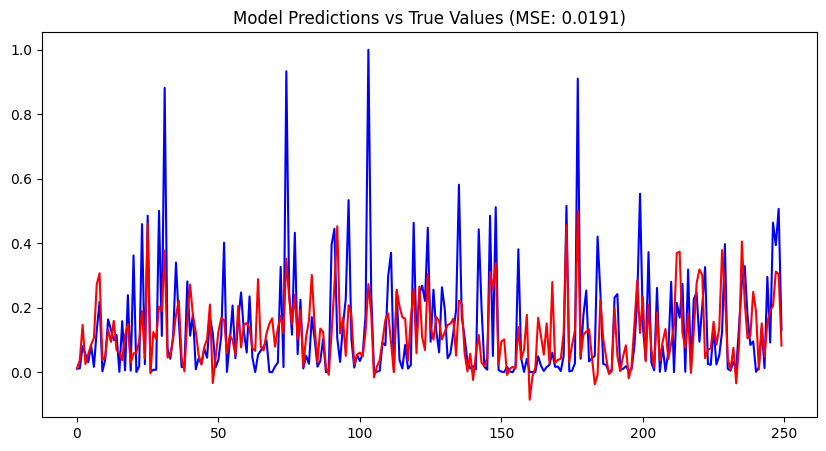

In [13]:
print("Evaluating model without subsampling...")
mse_regular = model.plot_model_on_test()
print(f'Mean Squared Error on test set (without subsampling): {mse_regular:.6f}')

## Training With Subsampling
Now, let's train the model with subsampling using a modified architecture to handle the reduced dimensions.

In [16]:
model_subsampled = Model_CNN(data_path)

print("Loading data with subsampling...")
print("Original data shapes before subsampling:")
model_subsampled.load_data(sub_sampling=True, sub_sample_dim=4)
print("Data shapes after subsampling:")
print(f"X shape: {model_subsampled.X.shape}")
print(f"Target shape: {model_subsampled.target.shape}")
model_subsampled.prepare_data_for_tensorflow()

Loading data with subsampling...
Original data shapes before subsampling:
Msl input shape: (1827, 120, 408)
input_file_names: ['era5_1940_mean_sea_level_pressure.nc', 'era5_1941_mean_sea_level_pressure.nc', 'era5_1942_mean_sea_level_pressure.nc', 'era5_1943_mean_sea_level_pressure.nc', 'era5_1944_mean_sea_level_pressure.nc']
T850 input shape: (1827, 120, 408)
input_file_names_t850: ['era5_1940_temperature_850hPa.nc', 'era5_1941_temperature_850hPa.nc', 'era5_1942_temperature_850hPa.nc', 'era5_1943_temperature_850hPa.nc', 'era5_1944_temperature_850hPa.nc']
Precipitation target shape: (1827,)
target_file_names: ['era5_1940_total_precipitation.nc', 'era5_1941_total_precipitation.nc', 'era5_1942_total_precipitation.nc', 'era5_1943_total_precipitation.nc', 'era5_1944_total_precipitation.nc']
Sub-sampling data...
Sub-sampled X shape: (7308, 2, 30, 102)
Concatenated precipitation target shape: (7308,)
Data shapes after subsampling:
X shape: (7308, 2, 30, 102)
Target shape: (7308,)
X_train shap

In [17]:
subsampled_conv_layers = [
    (32, 3, 2),
    (64, 3, 2),
    (64, 3, 1)
]
subsampled_fc_layers = [128, 64]

print("Building model for subsampled data...")
model_subsampled.build_model(
    dropout_rate=0.2,
    conv_layers=subsampled_conv_layers,
    fc_layers=subsampled_fc_layers
)

Building model for subsampled data...
Model summary: ==========================================================================================
Layer (type:depth-idx)                   Output Shape              Param #
FlexibleCNN                              [1, 1]                    --
├─Sequential: 1-1                        [1, 64, 7, 25]            --
│    └─Conv2d: 2-1                       [1, 32, 30, 102]          608
│    └─BatchNorm2d: 2-2                  [1, 32, 30, 102]          64
│    └─ReLU: 2-3                         [1, 32, 30, 102]          --
│    └─MaxPool2d: 2-4                    [1, 32, 15, 51]           --
│    └─Dropout2d: 2-5                    [1, 32, 15, 51]           --
│    └─Conv2d: 2-6                       [1, 64, 15, 51]           18,496
│    └─BatchNorm2d: 2-7                  [1, 64, 15, 51]           128
│    └─ReLU: 2-8                         [1, 64, 15, 51]           --
│    └─MaxPool2d: 2-9                    [1, 64, 7, 25]            --
│    

In [18]:
print("Training model with subsampling...")
model_subsampled.train_model(
    epochs=100,
    batch_size=256,
    learning_rate=1e-3,
    validation_split=0.2,
    weight_decay=1e-5,
    patience=5,
    factor=0.5,
    early_stopping_patience=7
)

Training model with subsampling...
Epoch 1/100 — Train Loss: 0.1458 — Val Loss: 0.0441
Epoch 2/100 — Train Loss: 0.0779 — Val Loss: 0.0394
Epoch 3/100 — Train Loss: 0.0669 — Val Loss: 0.0408
Epoch 4/100 — Train Loss: 0.0577 — Val Loss: 0.0381
Epoch 5/100 — Train Loss: 0.0515 — Val Loss: 0.0360
Epoch 6/100 — Train Loss: 0.0489 — Val Loss: 0.0365
Epoch 7/100 — Train Loss: 0.0443 — Val Loss: 0.0361
Epoch 8/100 — Train Loss: 0.0428 — Val Loss: 0.0356
Epoch 9/100 — Train Loss: 0.0418 — Val Loss: 0.0355
Epoch 10/100 — Train Loss: 0.0408 — Val Loss: 0.0356
Epoch 11/100 — Train Loss: 0.0399 — Val Loss: 0.0355
Epoch 12/100 — Train Loss: 0.0386 — Val Loss: 0.0356
Epoch 13/100 — Train Loss: 0.0381 — Val Loss: 0.0356
Epoch 14/100 — Train Loss: 0.0372 — Val Loss: 0.0358
Epoch 15/100 — Train Loss: 0.0381 — Val Loss: 0.0355
Epoch 16/100 — Train Loss: 0.0376 — Val Loss: 0.0354
Epoch 17/100 — Train Loss: 0.0367 — Val Loss: 0.0355
Epoch 18/100 — Train Loss: 0.0366 — Val Loss: 0.0355
Epoch 19/100 — Train

Evaluating model with subsampling...
Mean Squared Error on test set (with subsampling): 0.034680


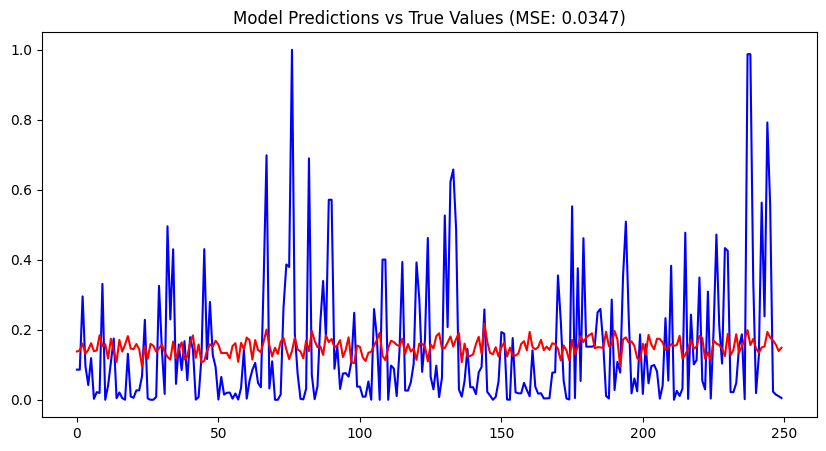

In [19]:
print("Evaluating model with subsampling...")
mse_subsampled = model_subsampled.plot_model_on_test()
print(f'Mean Squared Error on test set (with subsampling): {mse_subsampled:.6f}')

## Comparison of Results
Compare the performance between regular and subsampled approaches.

In [ ]:
print("Performance Comparison:")
print(f"MSE without subsampling: {mse_regular:.6f}")
print(f"MSE with subsampling: {mse_subsampled:.6f}")
print(f"Relative improvement: {((mse_regular - mse_subsampled) / mse_regular) * 100:.2f}%")

## Optuna search
trying to find better HP's

Loading data for optimization...
Msl input shape: (1827, 120, 408)
input_file_names: ['era5_1940_mean_sea_level_pressure.nc', 'era5_1941_mean_sea_level_pressure.nc', 'era5_1942_mean_sea_level_pressure.nc', 'era5_1943_mean_sea_level_pressure.nc', 'era5_1944_mean_sea_level_pressure.nc']
T850 input shape: (1827, 120, 408)
input_file_names_t850: ['era5_1940_temperature_850hPa.nc', 'era5_1941_temperature_850hPa.nc', 'era5_1942_temperature_850hPa.nc', 'era5_1943_temperature_850hPa.nc', 'era5_1944_temperature_850hPa.nc']
Precipitation target shape: (1827,)
target_file_names: ['era5_1940_total_precipitation.nc', 'era5_1941_total_precipitation.nc', 'era5_1942_total_precipitation.nc', 'era5_1943_total_precipitation.nc', 'era5_1944_total_precipitation.nc']
No sub-sampling applied.
X shape: (1827, 2, 120, 408)
Precipitation target shape: (1827,)


[I 2025-05-29 15:42:10,816] A new study created in memory with name: no-name-5b4e2126-c02b-4f45-bbfc-c68348457956


X_train shape: (1577, 2, 120, 408)
y_train shape: (1577, 1)
X_test shape: (250, 2, 120, 408)
y_test shape: (250, 1)
Starting Optuna hyperparameter optimization...
Model summary: ==========================================================================================
Layer (type:depth-idx)                   Output Shape              Param #
FlexibleCNN                              [1, 1]                    --
├─Sequential: 1-1                        [1, 56, 10, 34]           --
│    └─Conv2d: 2-1                       [1, 48, 120, 408]         912
│    └─BatchNorm2d: 2-2                  [1, 48, 120, 408]         96
│    └─ReLU: 2-3                         [1, 48, 120, 408]         --
│    └─MaxPool2d: 2-4                    [1, 48, 40, 136]          --
│    └─Dropout2d: 2-5                    [1, 48, 40, 136]          --
│    └─Conv2d: 2-6                       [1, 53, 40, 136]          22,949
│    └─BatchNorm2d: 2-7                  [1, 53, 40, 136]          106
│    └─ReLU: 2-8    

[I 2025-05-29 15:56:04,026] Trial 0 finished with value: 0.028120018541812897 and parameters: {'n_conv_layers': 3, 'conv_filters_0': 48, 'kernel_size_0': 3, 'pool_size_0': 3, 'conv_filters_1': 53, 'kernel_size_1': 3, 'pool_size_1': 2, 'conv_filters_2': 56, 'kernel_size_2': 7, 'pool_size_2': 2, 'n_fc_layers': 2, 'fc_size_0': 512, 'fc_size_1': 128, 'dropout_rate': 0.3546079586764803, 'learning_rate': 0.00010663356151303447, 'weight_decay': 0.00012142275678262564}. Best is trial 0 with value: 0.028120018541812897.


Model summary: ==========================================================================================
Layer (type:depth-idx)                   Output Shape              Param #
FlexibleCNN                              [1, 1]                    --
├─Sequential: 1-1                        [1, 59, 4, 15]            --
│    └─Conv2d: 2-1                       [1, 48, 120, 408]         912
│    └─BatchNorm2d: 2-2                  [1, 48, 120, 408]         96
│    └─ReLU: 2-3                         [1, 48, 120, 408]         --
│    └─MaxPool2d: 2-4                    [1, 48, 40, 136]          --
│    └─Dropout2d: 2-5                    [1, 48, 40, 136]          --
│    └─Conv2d: 2-6                       [1, 51, 40, 136]          120,003
│    └─BatchNorm2d: 2-7                  [1, 51, 40, 136]          102
│    └─ReLU: 2-8                         [1, 51, 40, 136]          --
│    └─MaxPool2d: 2-9                    [1, 51, 13, 45]           --
│    └─Dropout2d: 2-10                   [

[I 2025-05-29 16:03:29,417] Trial 1 finished with value: 0.2922608554363251 and parameters: {'n_conv_layers': 3, 'conv_filters_0': 48, 'kernel_size_0': 3, 'pool_size_0': 3, 'conv_filters_1': 51, 'kernel_size_1': 7, 'pool_size_1': 3, 'conv_filters_2': 59, 'kernel_size_2': 5, 'pool_size_2': 3, 'n_fc_layers': 2, 'fc_size_0': 512, 'fc_size_1': 256, 'dropout_rate': 0.2922273506212879, 'learning_rate': 2.9488053888348885e-05, 'weight_decay': 2.268016063366234e-06}. Best is trial 0 with value: 0.028120018541812897.



Best trial results:
Best MSE: 0.028120

Best hyperparameters:
n_conv_layers: 3
conv_filters_0: 48
kernel_size_0: 3
pool_size_0: 3
conv_filters_1: 53
kernel_size_1: 3
pool_size_1: 2
conv_filters_2: 56
kernel_size_2: 7
pool_size_2: 2
n_fc_layers: 2
fc_size_0: 512
fc_size_1: 128
dropout_rate: 0.3546079586764803
learning_rate: 0.00010663356151303447
weight_decay: 0.00012142275678262564

Training final model with optimal hyperparameters...
Model summary: ==========================================================================================
Layer (type:depth-idx)                   Output Shape              Param #
FlexibleCNN                              [1, 1]                    --
├─Sequential: 1-1                        [1, 56, 10, 34]           --
│    └─Conv2d: 2-1                       [1, 48, 120, 408]         912
│    └─BatchNorm2d: 2-2                  [1, 48, 120, 408]         96
│    └─ReLU: 2-3                         [1, 48, 120, 408]         --
│    └─MaxPool2d: 2-4       

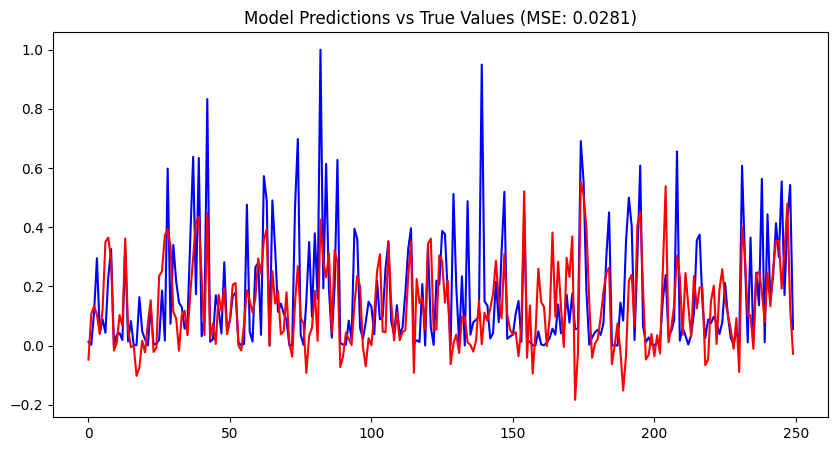

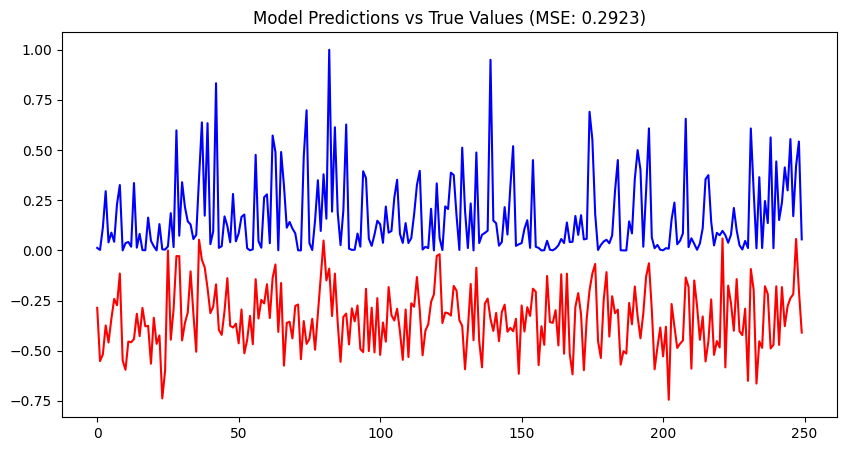

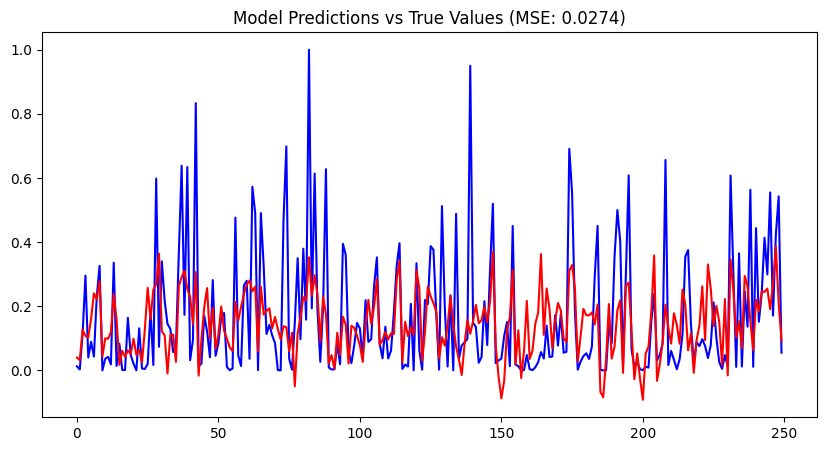

In [4]:
# Create a new model instance for optimization
model_optuna = Model_CNN(data_path)

print("Loading data for optimization...")
model_optuna.load_data(sub_sampling=False)
model_optuna.prepare_data_for_tensorflow()

# Run Optuna trials
print("Starting Optuna hyperparameter optimization...")
n_trials = 2  # You can adjust this number based on your computational resources
best_trial = model_optuna.optuna_trial(ntrials=n_trials)

# Print results
print("\nBest trial results:")
print(f"Best MSE: {best_trial.value:.6f}")
print("\nBest hyperparameters:")
for key, value in best_trial.params.items():
    print(f"{key}: {value}")

# Train final model with best parameters
print("\nTraining final model with optimal hyperparameters...")

# Extract best parameters
best_dropout = best_trial.params["dropout_rate"]
best_lr = best_trial.params["learning_rate"]
best_weight_decay = best_trial.params["weight_decay"]

# Build conv layers from best parameters
best_conv_layers = []
i = 0
while f"conv_filters_{i}" in best_trial.params:
    filters = best_trial.params[f"conv_filters_{i}"]
    kernel = best_trial.params[f"kernel_size_{i}"]
    pool = best_trial.params[f"pool_size_{i}"]
    best_conv_layers.append((filters, kernel, pool))
    i += 1

# Build FC layers from best parameters
best_fc_layers = []
i = 0
while f"fc_size_{i}" in best_trial.params:
    fc_size = best_trial.params[f"fc_size_{i}"]
    best_fc_layers.append(fc_size)
    i += 1

# Build and train final model with optimal parameters
model_optuna.build_model(
    dropout_rate=best_dropout,
    conv_layers=best_conv_layers,
    fc_layers=best_fc_layers
)

model_optuna.train_model(
    epochs=100,
    batch_size=128,
    learning_rate=best_lr,
    weight_decay=best_weight_decay,
    patience=10,
    factor=0.5,
    early_stopping_patience=7
)

# Evaluate final model
print("\nFinal model evaluation:")
mse_optuna = model_optuna.plot_model_on_test()
print(f'Mean Squared Error on test set (optimized): {mse_optuna:.6f}')